# PROJECT 3: Heart Disease Binary Classification

## Summary
This dataset of interest contains information regarding the presence of heart disease in patients across 4 databases - Cleveland, Hungary, Switzerland and the VA Long Beach. The original data contained 76 attributes (columns), however, all the published experiments focused on a subset of only 14 attributes. The Cleveland database was refined to distinguish the presence from absence of heart disease, rather than the degree of presence (which was evident in the three other unrefined databases). This is the particular set of data that will be analysed within this project as it signifies the potential for binary classification. 

The database was found from the UCI Machine Learning Repository, but effectively retrieved through Kaggle's Public API.
Original authors/ principal investigators responsible for the collection of the dataset are as denoted: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

Donor: 
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

## Problem:
Can the presence of heart disease be predicted using machine learning models? How accurate will these models be?

The following steps of analysis will be taken: 
1. Perform data pre-processing (cleaning, EDA/statistical modelling and visualisation)
2. Load dataset into database
    - split into raw, train and test sets
3. Feature engineering
    - select features
    - create feature vector/ matrix
4. Apply Machine Learning (supervised, classification)
    - train and test models
    - evaluate model

## Retrieving the Data 

In [1]:
!pip install --user kaggle

In [2]:
!mkdir ~/.kaggle

mkdir: /Users/annaschreiner/.kaggle: File exists


In [3]:
!cp /Users/annaschreiner/Downloads/kaggle.json /Users/annaschreiner/.kaggle/kaggle.json

In [4]:
!cd /Users/annaschreiner/.kaggle && ls

kaggle.json


In [5]:
!~/.local/bin/kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        152           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        191           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        314           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2372           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18158           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4701           False  
connectx

In [6]:
!~/.local/bin/kaggle datasets list -s heart

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ronitf/heart-disease-uci                                      Heart Disease UCI                                     3KB  2018-06-25 11:33:56         163292       3963  0.7647059        
andrewmvd/heart-failure-clinical-data                         Heart Failure Prediction                              4KB  2020-06-20 01:03:20          14363        536  1.0              
johnsmith88/heart-disease-dataset                             Heart Disease Dataset                                 6KB  2019-06-06 15:33:55           9924        165  0.88235295       
imnikhilanand/heart-attack-prediction                         Heart At

In [7]:
!~/.local/bin/kaggle datasets download -d ronitf/heart-disease-uci

heart-disease-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip heart-disease-uci.zip -d Data

## Perform EDA on the Dataset

##### Read and preview the first 10 rows of the csv

In [22]:
!pip install --upgrade pandas

     |████████████████████████████████| 10.1 MB 1.6 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
heart = pd.read_csv('heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Dataframe dimensions and statistical exploration

In [10]:
heart.shape

(303, 14)

- 53940 rows of data/ evaluated diamonds
- 11 defined columns of associated attributes

In [11]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The dataset displays multiple attributes, or predictor variables, that lead to one target variable - aptly defined 'target'. The target variable denotes the presence or absence of heart disease in a patient. Will come back to this in feature engineering. 

##### Attribute Information:

- age: age in years
- sex: gender (1 = male, 0 = female)
- cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: when fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
- restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: maximum heart rate achieved 
- exang: exercise induced angina (1 = yes, 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
- ca: number of major vessels (0-3) colored by flourosopy
- thal: thalassemia, a blood disorder (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: diagnosis of heart disease (0 'No' = < 50% diameter narrowing, 1 'Yes' = > 50% diameter narrowing)

In [12]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

- Categorical Features (Qualitative) : Sex, cp, fbs, restecg, exang, slope, thal, target
- Numerical Features (Quantitative) : age, trestbps, chol, thalach, oldpeak, ca

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


##### Questionable descriptors?
- Note the minimums.. unrealistic zeros? 
- confirmed realistic. All checks out!

### Data Cleaning

##### Check for nulls

In [15]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- Confirmed no Nulls

##### Column name adjustment for future ease of evaluation

In [16]:
heart.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression', 'st_slope', 'major_vessels', 'thalassemia', 'diagnosis']

In [17]:
heart.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thalassemia,diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Visual Exploration on Variables of Interest

Pairplot of the dataset:

/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, Use

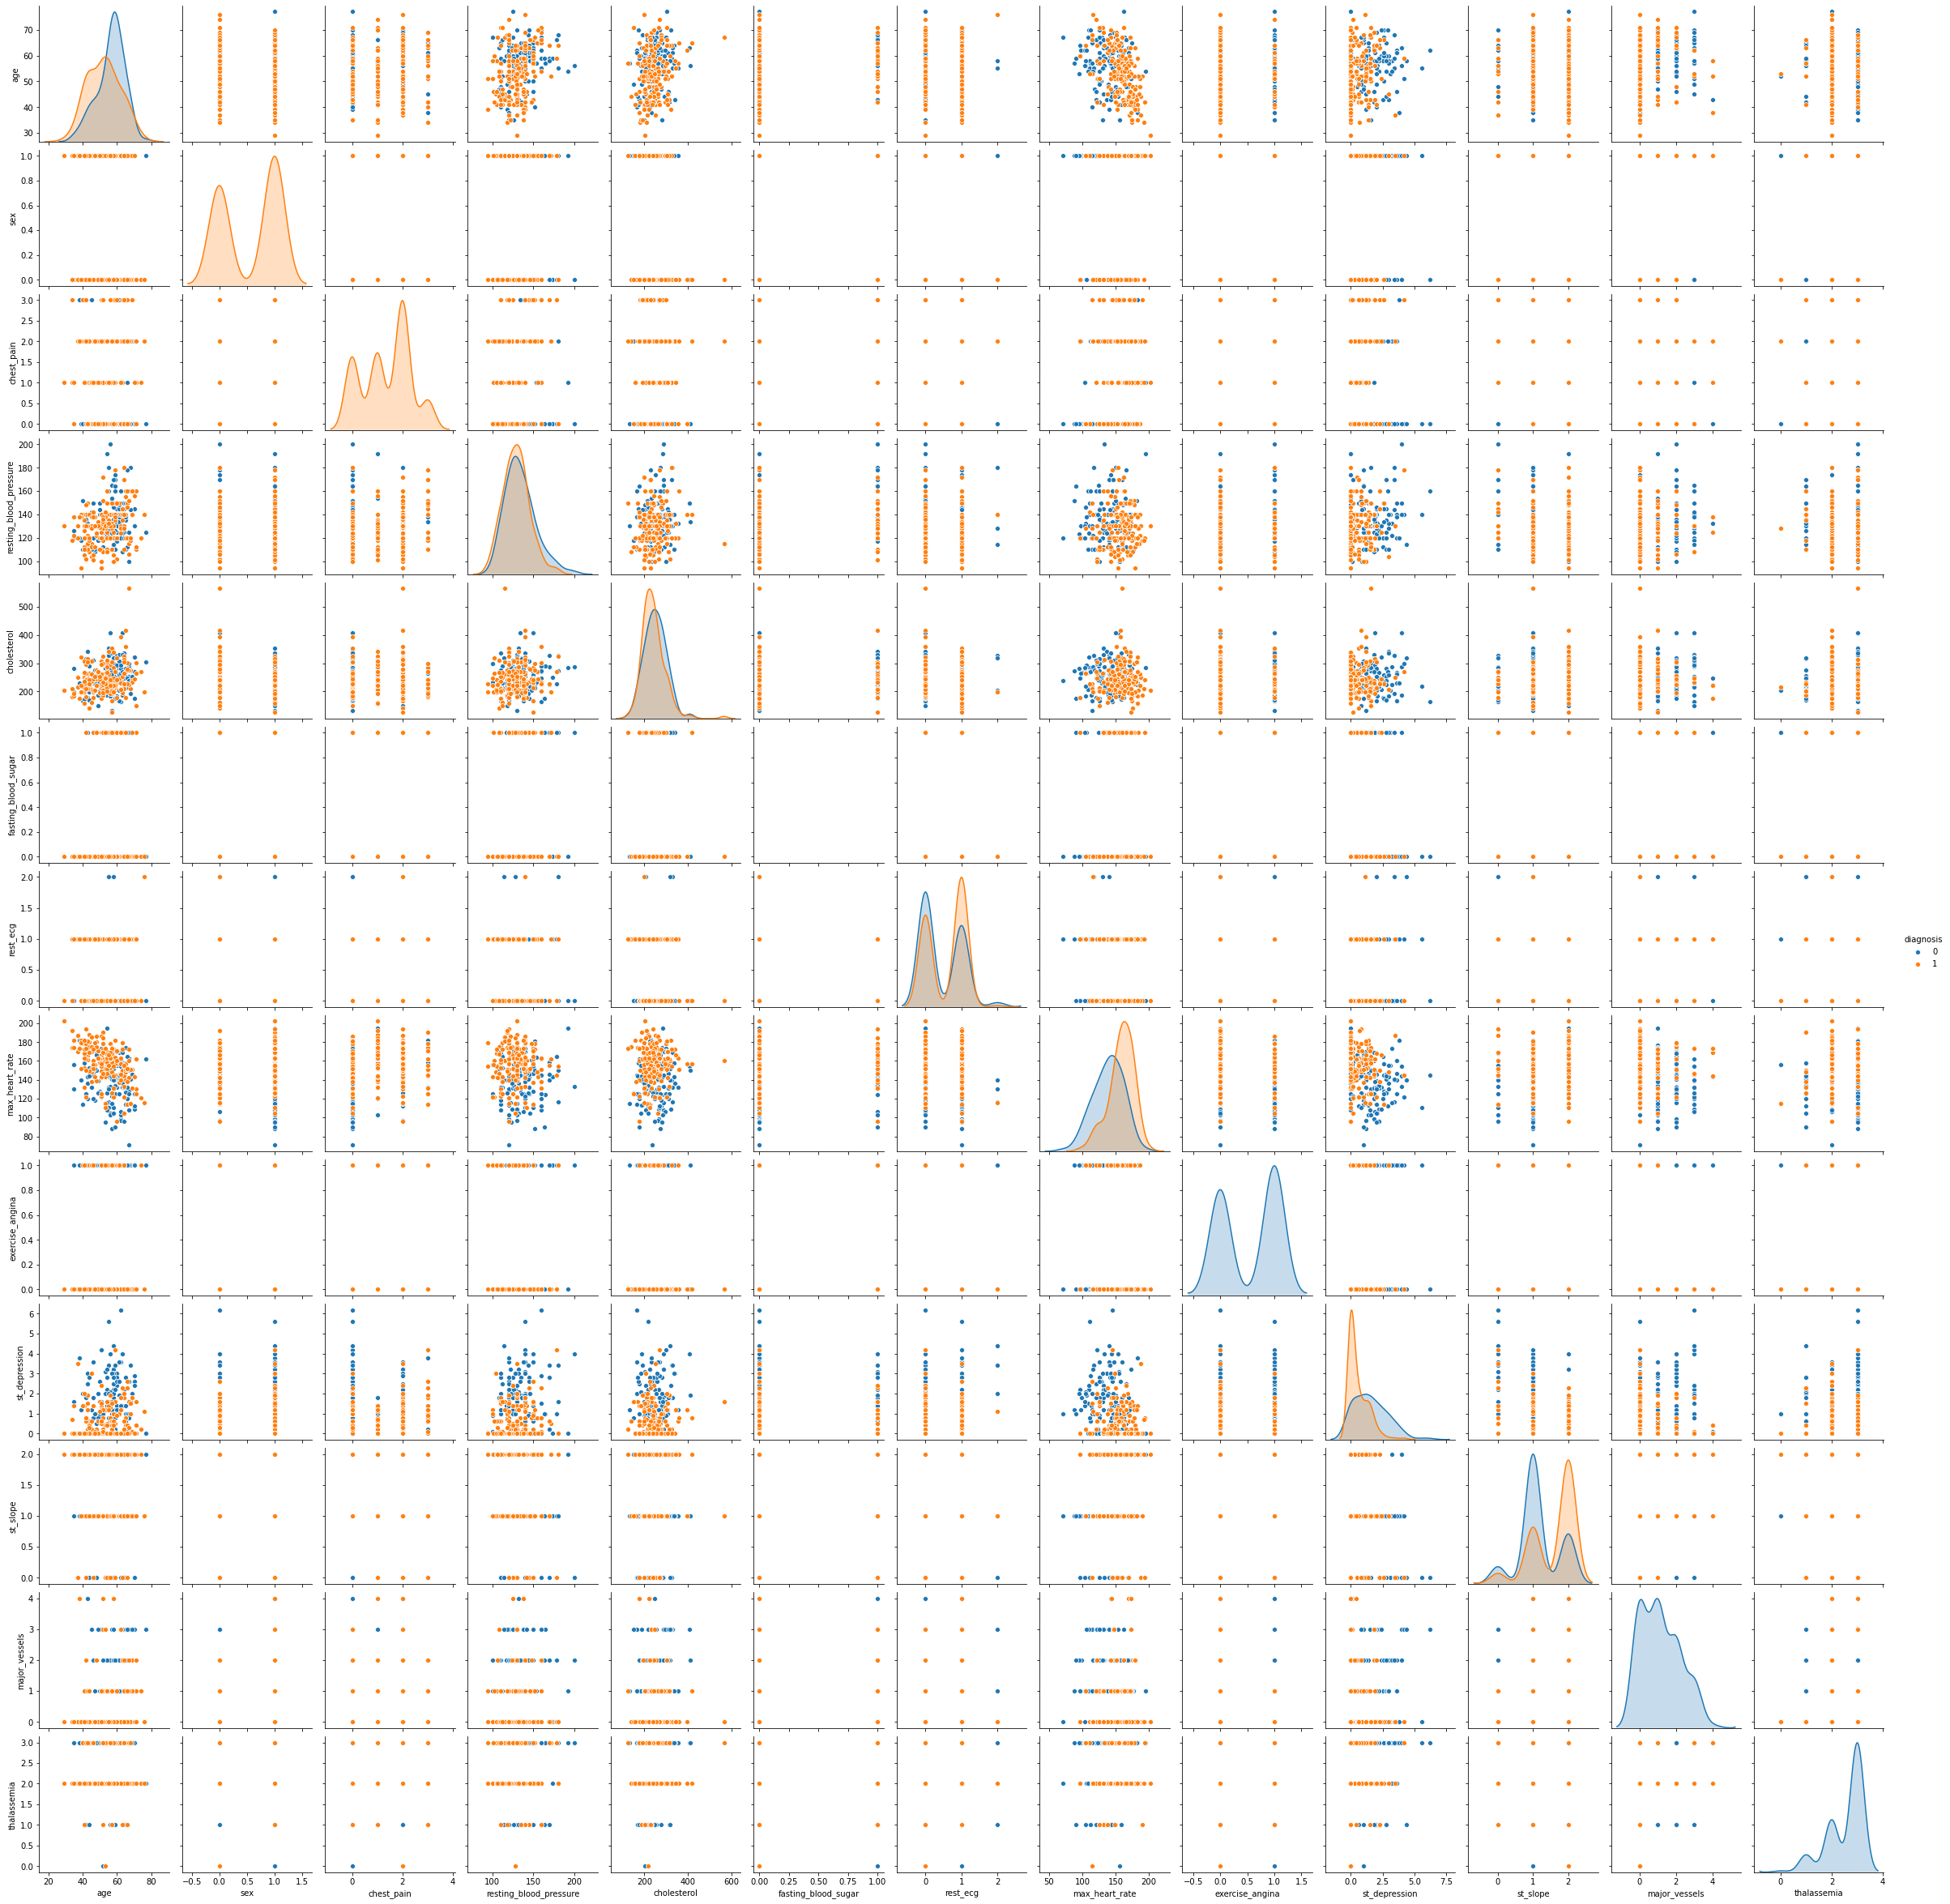

In [18]:
sns.pairplot(heart, hue='diagnosis')

Dataset correlation:

In [19]:
heart_corr = heart.corr()
heart_corr

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thalassemia,diagnosis
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, 'Heart Disease Dataset Correlation Heat Map')

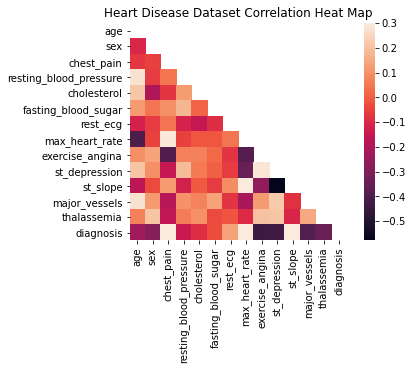

In [81]:
mask = np.zeros_like(heart_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(heart_corr, mask=mask, vmax=.3, square=True)
plt.title('Heart Disease Dataset Correlation Heat Map')

Value count of the target variable, patient diagnosis:

In [21]:
heart['diagnosis'].value_counts()

1    165
0    138
Name: diagnosis, dtype: int64

In [22]:
heart['diagnosis'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: diagnosis, dtype: float64

Text(0.5, 1.0, 'Diagnosis Barplot')

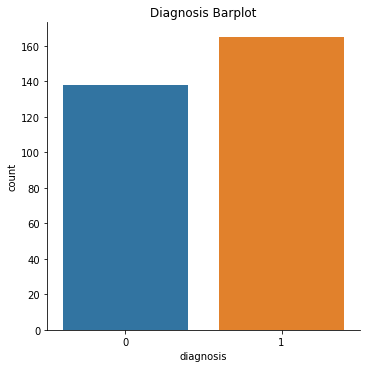

In [23]:
sns.catplot(x='diagnosis', data=heart , kind='count' )
plt.title('Diagnosis Barplot')

- the above blot visually reiterates that 165 (54%) patients have heart disease, and 138 (46%) do not.

Frequency of the diagnosis across gender:

Text(0.5, 1.0, 'Test Patient Gender')

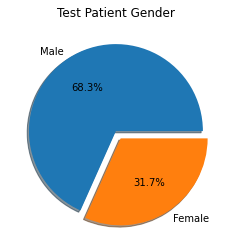

In [24]:
plt.pie(heart['sex'].value_counts(), explode=(0,0.1), labels=["Male","Female"], autopct='%1.1f%%', shadow=True)
plt.title("Test Patient Gender")

In [25]:
heart.groupby('sex')['diagnosis'].value_counts()

sex  diagnosis
0    1             72
     0             24
1    0            114
     1             93
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Diagnosis Across Gender Barplot')

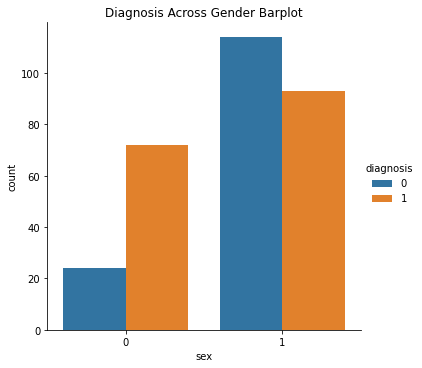

In [26]:
sns.catplot(x='sex', hue='diagnosis', data=heart , kind='count')
plt.title('Diagnosis Across Gender Barplot')

- 1 = male, 0 = female; 
- 1 = HD present, 0 = HD not present
- Females: out of 96 females, 72 have HD (75%)
- Males: out of 207 males, 93 have HD (45%)

Frequency of the diagnosis across fasting blood sugar:

Text(0.5, 21.70625000000002, 'Presence of FBS')

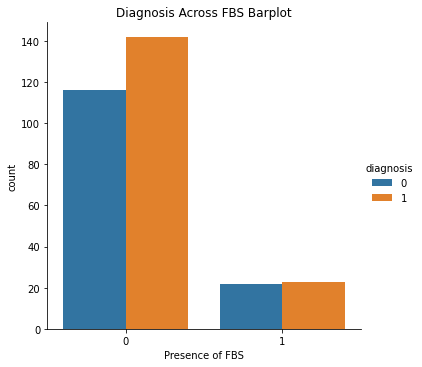

In [27]:
sns.catplot(x='fasting_blood_sugar', hue='diagnosis', data=heart , kind='count')
plt.title('Diagnosis Across FBS Barplot')
plt.xlabel('Presence of FBS')

- no visible relationship between FBS and diagnosis, as there is little variance in the target outcome in the two FBS classes
- expected, as correlation was low

Frequency of the diagnosis across exercise induced angina:

Text(0.5, 21.70625000000002, 'Presence of EIA')

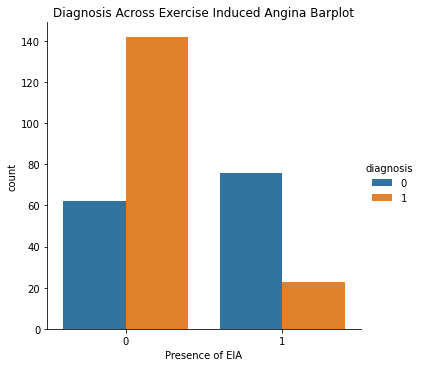

In [28]:
sns.catplot(x='exercise_angina', hue='diagnosis', data=heart , kind='count')
plt.title('Diagnosis Across Exercise Induced Angina Barplot')
plt.xlabel('Presence of EIA')

- Far more significant visual relationship. When exercise-induced angina was present (1), the patient was less likely to have heart disease. On the otherhand, if EIA was not present, the patient was more likely to have heart disease. 
- this reflects the negative correlation previously observed

Exploration of chest pain against diagnosis (strongest positive correlation)

In [29]:
heart['chest_pain'].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

Text(0.5, 6.79999999999999, 'Chest Pain Type')

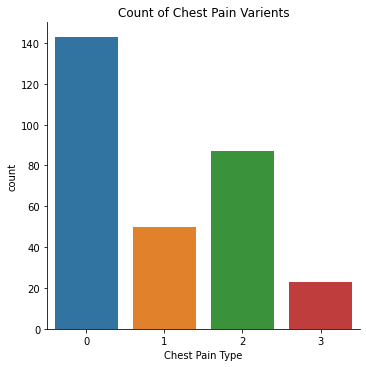

In [30]:
sns.catplot(x='chest_pain', data=heart , kind='count')
plt.title('Count of Chest Pain Varients')
plt.xlabel('Chest Pain Type')

In [31]:
heart.groupby('chest_pain')['diagnosis'].value_counts()

chest_pain  diagnosis
0           0            104
            1             39
1           1             41
            0              9
2           1             69
            0             18
3           1             16
            0              7
Name: diagnosis, dtype: int64

Text(0.5, 21.70625000000002, 'Chest Pain Type')

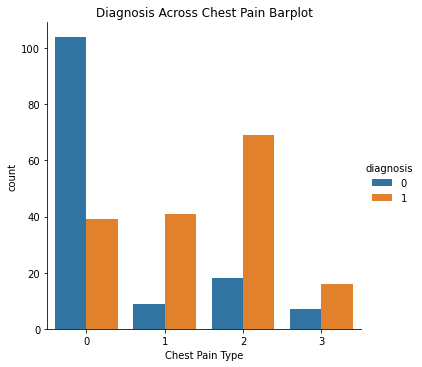

In [32]:
sns.catplot(x='chest_pain', hue='diagnosis', data=heart , kind='count')
plt.title('Diagnosis Across Chest Pain Barplot')
plt.xlabel('Chest Pain Type')

- Out of the four type of chest pain, Typical Angina (0) was the only one which predominently did not correlate with a diagnosis of heart disease. 

Maximum heart rate against diagnosis:

Text(0, 0.5, 'Frequency')

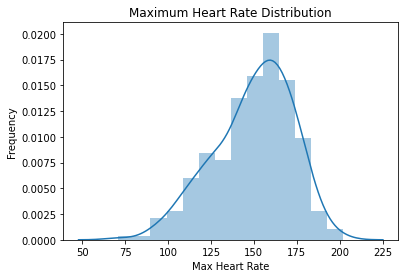

In [33]:
sns.distplot(heart['max_heart_rate'])
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')

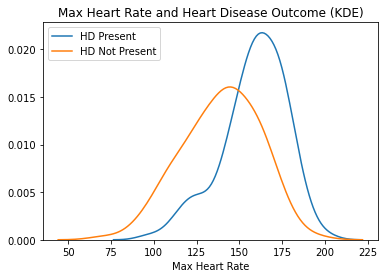

In [34]:
sns.distplot(heart[heart.diagnosis==1]['max_heart_rate'], hist=False,kde=True,label='HD Present')
sns.distplot(heart[heart.diagnosis==0]['max_heart_rate'], hist=False,kde=True,label='HD Not Present')
plt.legend(loc='best')
plt.title('Max Heart Rate and Heart Disease Outcome (KDE)')
plt.xlabel('Max Heart Rate')
plt.show()

Text(3.674999999999997, 0.5, 'Max Heart Rate')

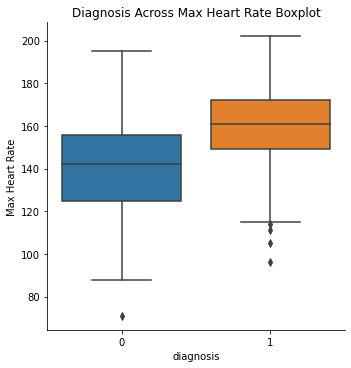

In [35]:
sns.catplot(x='diagnosis', y='max_heart_rate', data=heart , kind='box')
plt.title('Diagnosis Across Max Heart Rate Boxplot')
plt.ylabel('Max Heart Rate')

- the above boxplot and KDE both confirm that patients with heart disease present have generally higher heart rate, in contrast to patients without HD.

Diagnosis across age:

Text(0, 0.5, 'Frequency')

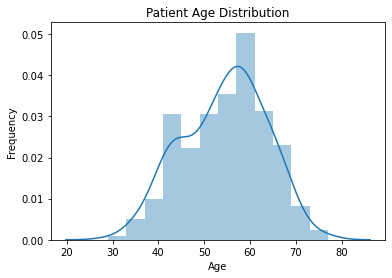

In [36]:
sns.distplot(heart['age'])
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

- distribution approximately normal

Text(10.049999999999997, 0.5, 'Age')

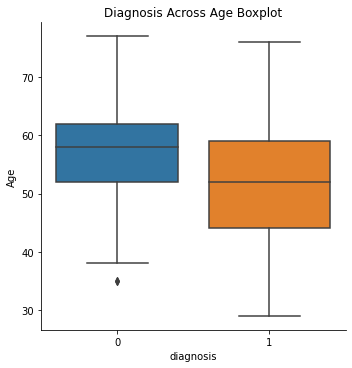

In [37]:
sns.catplot(x='diagnosis', y='age', data=heart , kind='box')
plt.title('Diagnosis Across Age Boxplot')
plt.ylabel('Age')

- firstly, the average age of those with HD is lower than that of those without HD
- the distribution/spread of age across patients with HD is far greater than those without

Text(0.5, 1.0, 'Patient Diagnosis Relative to Age and Cholesterol (LinReg)')

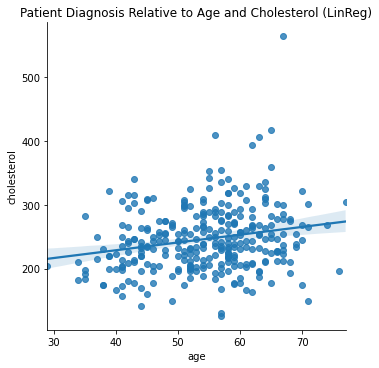

In [38]:
sns.lmplot(x='age', y= 'cholesterol', data=heart, fit_reg=True)
plt.title('Patient Diagnosis Relative to Age and Cholesterol (LinReg)')

- linear regression does not seem to be a good fit in determining a reltionship between age and cholesterol

## Load Dataset into SQL Database

In [39]:
import sqlite3
sqlite_db = 'heart.sqlite'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()
import pandas as pd
from pandas.io import sql

In [40]:
pwd

'/Users/annaschreiner/Desktop/Institute of Data/Week 6/5 Friday (Mini Project 3)'

In [41]:
heart.to_sql('raw', con = conn, if_exists = 'replace', index = False)

Load raw data from database into a workable dataframe:

In [42]:
raw = pd.read_sql_query('SELECT * FROM raw;',conn)
raw

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thalassemia,diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Feature Engineering

Note: feature engineering will occur BEFORE spliting the data into train/test sets

##### Set target variable for Heart Disease dataset

In [43]:
y = raw['diagnosis']

- using the diagnosis as the target variable was self-explanatory as it is the key component to the dataset "problem". The basis was to predict whether the dignostic outcome of patients could be modelled using various predictor variables. It is also convenietly binary, which aids in the classfication analysis.

##### Set predictor variables:

Check correlation in relation to target variable

In [44]:
raw.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                 1.000000
chest_pain                0.433798
max_heart_rate            0.421741
st_slope                  0.345877
rest_ecg                  0.137230
fasting_blood_sugar      -0.028046
cholesterol              -0.085239
resting_blood_pressure   -0.144931
age                      -0.225439
sex                      -0.280937
thalassemia              -0.344029
major_vessels            -0.391724
st_depression            -0.430696
exercise_angina          -0.436757
Name: diagnosis, dtype: float64

- in the process of understanding the original dataset from the source (UCI), I noted that there were originally 76 attributes. These were then refined to 14, exclusive of diagnosis. As the dataset has already seen significant feature selection I am reluctant to cull anymore. For the sake of the project, I will use features with a correlation to deagnosis greater than +/- 0.2
- this removes rest_ecg, fasting_blood_sugar, cholestral and resting_blood_pressure from the model.
- all predictor features remain numerical so no dummy variables or encoded mapping is necessary

Predictor feature matrix:

In [45]:
predictor_columns = ['chest_pain', 'max_heart_rate','st_slope','age','sex','thalassemia','major_vessels','st_depression','exercise_angina']
X = raw[predictor_columns]
X.head()

,chest_pain,max_heart_rate,st_slope,age,sex,thalassemia,major_vessels,st_depression,exercise_angina
0,3,150,0,63,1,1,0,2.3,0
1,2,187,0,37,1,2,0,3.5,0
2,1,172,2,41,0,2,0,1.4,0
3,1,178,2,56,1,2,0,0.8,0
4,0,163,2,57,0,2,0,0.6,1


## Split data into training and testing

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
print("Total dataset: {}".format(raw.shape))
print("Training set (80%): {}".format(X_train.shape))
print("Test set (20%): {}".format(X_test.shape))

Total dataset: (303, 14)
Training set (80%): (212, 9)
Test set (20%): (91, 9)


In [49]:
X_train

,chest_pain,max_heart_rate,st_slope,age,sex,thalassemia,major_vessels,st_depression,exercise_angina
124,2,179,2,39,0,2,0,0.0,0
72,1,202,2,29,1,2,0,0.0,0
15,2,158,1,50,0,2,0,1.6,0
10,0,160,2,54,1,2,0,1.2,0
163,2,173,2,38,1,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...
188,2,163,1,50,1,3,1,0.6,0
71,2,154,2,51,1,3,1,0.0,1
106,3,131,1,69,1,2,1,0.1,0
270,0,144,2,46,1,3,0,0.8,0


In [50]:
X_test

,chest_pain,max_heart_rate,st_slope,age,sex,thalassemia,major_vessels,st_depression,exercise_angina
179,0,112,1,57,1,1,1,0.6,1
228,3,159,1,59,1,3,0,0.2,0
111,2,173,2,57,1,3,1,0.2,0
246,0,150,1,56,0,3,2,1.9,1
60,2,130,2,71,0,2,1,0.0,0
...,...,...,...,...,...,...,...,...,...
250,0,122,1,51,1,3,3,4.2,1
19,3,151,2,69,0,2,2,1.8,0
143,0,142,2,67,0,2,2,0.3,0
79,2,154,1,58,1,3,0,0.6,1


##### Data Scaler

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Apply Machine Learning

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,confusion_matrix,auc

##### Logistic regression: 

Create Model

In [56]:
logreg = LogisticRegression()

Fit model (train on the training data set)

In [57]:
logreg.fit(X_train, y_train)

LogisticRegression()

Coefficients:

In [58]:
logreg.coef_

array([[ 0.82520581,  0.30042173,  0.51550694, -0.0686508 , -0.59193875,
        -0.70883619, -0.98729072, -0.52191277, -0.56659818]])

In [59]:
print(set(zip(predictor_columns, logreg.coef_[0])))

{('exercise_angina', -0.5665981787760241), ('major_vessels', -0.9872907158826071), ('chest_pain', 0.8252058061109516), ('age', -0.06865080070303092), ('max_heart_rate', 0.300421727564883), ('st_depression', -0.5219127707321426), ('st_slope', 0.5155069357194226), ('thalassemia', -0.7088361899402217), ('sex', -0.591938747975218)}


Accuracy Score:

In [60]:
print('Training Data Accuracy = {:7.4f}'.format(logreg.score(X_train, y_train)))

Training Data Accuracy =  0.8585


In [61]:
print('Test Data Accuracy = {:7.4f}'.format(logreg.score(X_test, y_test)))

Test Data Accuracy =  0.8242


- test set and train set both predicted almost as well as eachother
- overfitting seems to be a low possibility

Plotting the ROC (Receiver Operating Characteristic) curve:

In [63]:
def plot_roc_curve(X_test, y_test):
    # Generate the prediction values for each observation (test set)
    preds = logreg.predict_proba(X_test)[:,1]

    # Store the fpr (false positive rate) and tpr (true positive rate)
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) for graph annotation
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='red', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'blue', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Heart Disease Detection')
    plt.legend(loc = "lower right")
    plt.show()

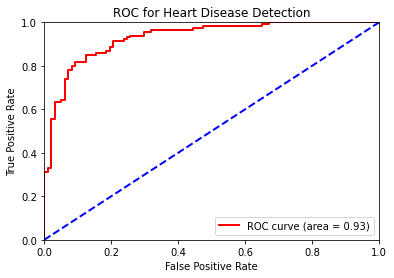

In [64]:
# Train set
plot_roc_curve(X_train, y_train)

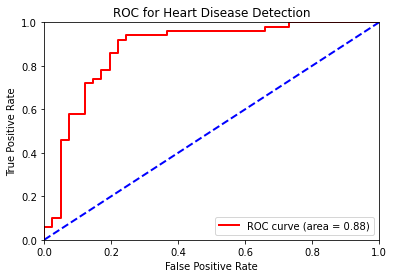

In [65]:
# Test set
plot_roc_curve(X_test, y_test)

## TRAIN            TEST

## Further Evaluation

##### Use cross validation

In [66]:
from sklearn.model_selection import cross_val_score
target_column = 'diagnosis'
predictor_columns = ['chest_pain', 'max_heart_rate','st_slope','age','sex','thalassemia','major_vessels','st_depression','exercise_angina']
logreg = LogisticRegression()
scores = cross_val_score(logreg, raw[predictor_columns], raw[target_column], cv=5)
scores.mean()

/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

0.8547540983606557

- cross-validation is used to asses the model quality when overfitting is controlled. In comparison to the previous accuracy scores, the CV score sits between that of both the test and train data.

##### Looking into the FPR and TPR vectors for the best model

Build and fit model:

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predict:

In [68]:
y_pred = logreg.predict(X_test)

Confusion matrix:

In [69]:
con_matrix = metrics.confusion_matrix(y_test, y_pred)
print(con_matrix)

#[row, column]
TP = con_matrix[1, 1]
TN = con_matrix[0, 0]
FP = con_matrix[0, 1]
FN = con_matrix[1, 0]

[[33  8]
 [ 8 42]]


In [70]:
# As a readable dataframe:
pd.DataFrame(con_matrix, index=['HD Present', 'HD Not Present'], columns=['Predicted HD','Predicted Healthy'])

,Predicted HD,Predicted Healthy
HD Present,33,8
HD Not Present,8,42


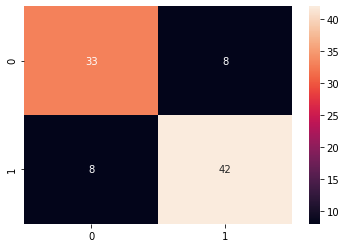

In [71]:
# As a heatmap:
sns.heatmap(con_matrix, annot=True,fmt="d")

Classification Report:

In [72]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Classification Accuracy:

In [73]:
# using both methods of calculation for comprehension 
# note: this is the initial logistic accuracy score calculated for the test set
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8241758241758241
0.8241758241758241


- this denotes that the classifier is accurate 82% of the time

Classification Error ("Misclassification Rate"):

In [74]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.17582417582417584
0.17582417582417587


- the classifier is incorrect 18% of the time

Sensitivity ("True Positive" or "Recall"):

In [75]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.84
0.84


- When the true value is positive, the prediction is correct 84% of the time. This is a value that you want to maximise as is signifies how sensitive the classifier model is at detecting positive instances

Specificity:

In [76]:
specificity = TN / (TN + FP)
print(specificity)

0.8048780487804879


- When the true value is negative, the prediction is correct 80% of the time. Again, this is a value that you want to maximise as is signifies how selective ("specific") the classifier model is at predicting positive instances

False Positive Rate:

In [77]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.1951219512195122
0.19512195121951215


- When the true value is negative, the prediction is incorrect 20% of the time

Precision:

In [78]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred))

0.84
0.84


- the classifier is precise (when a positive value is correctly predicted.) 84% of the time

## Summary

Based on the above modelling, it can be determined that Logistic Regression can be used to predict the presence of heart disease amoungst patients in this scenario. This is validated by the strong classification accuracy score of 82% (test set), and coherently low misclassification rate of 18%.  
Based on similar patient attributes within a medical database, this classfication ML model may predict health risks of this nature into the future. 